# Hierarchical Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Default seaborn theme, scaling & color palette

## Create some data from linear models

$y = \alpha + \beta * x + \epsilon$

$\alpha$, $\epsilon$ from normal distributions

$\beta$ from a beta distribution

In [2]:
N = 20
M = 8  # Num groups

idx = np.repeat(range(M-1), N)  # idx contains the group numbers
idx = np.append(idx, 7)  # A single data point in the 8th group
print('List of groups from which data originates:\n', idx)

List of groups from which data originates:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7]


In [3]:
alpha_real = np.random.normal(2.5, 0.5, size=M)  # Different alpha per group
beta_real = np.random.beta(60, 10, size=M)  # Different beta per group
eps_real = np.random.normal(0, 0.5, size=len(idx))  # Same epsilon for each group

y_m = np.zeros(len(idx))  
x_m = np.random.normal(10, 1, len(idx))  # Independent variable
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real  # Dependent variable

x_centered = x_m - np.mean(x_m)  # Center the independent variable before feading it in

print('Shape of x and y data:', x_m.shape, y_m.shape)

Shape of x and y data: (141,) (141,)


Text(0, 0.5, 'y_m')

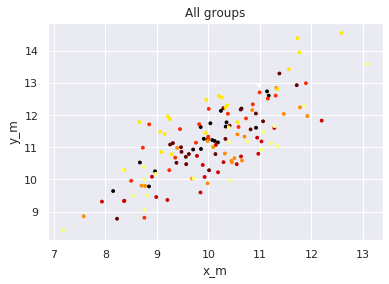

In [4]:
plt.scatter(x_m, y_m, c=idx, cmap='hot', s=8)
plt.title('All groups')
plt.xlabel('x_m')
plt.ylabel('y_m')

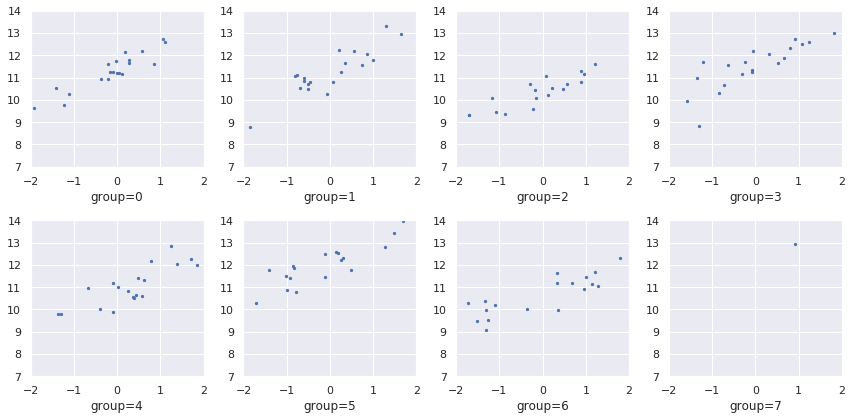

In [5]:
fig = plt.figure(figsize=(12, 6)) 
for i in range(M):
    ax = fig.add_subplot(2, M//2, i+1)
    ax.scatter(x_centered[i*N:(i+1)*N], y_m[i*N:(i+1)*N], s=5)
    ax.set_xlim(-2, 2)
    ax.set_ylim(7, 14)
    ax.set_xlabel('group={}'.format(i))
plt.tight_layout()

## Non-hierarchical model

$y = \alpha + \beta * x + \epsilon$

$\alpha$, $\epsilon$ from normal distributions

$\beta$ from a beta distribution

In [6]:
import pymc3 as pm

In [7]:
unpooled_model = pm.Model()
with unpooled_model:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10, shape=M)  # prior on offset (M groups)
    beta = pm.Normal('beta', mu=0, sd=10, shape=M)  # prior on gradient (M groups)
    epsilon = pm.HalfCauchy('epsilon', 5) # Prior on noise (same for each group)
    
    nu = pm.Exponential('nu', 1/30)  # Prior on the likelihood tail size
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx]*x_centered, sd=epsilon, nu=nu, observed=y_m) # likelihood
    
    alpha = pm.Deterministic('alpha', alpha_tmp - beta*x_m.mean())  # Re-scale the independent variable
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_up = pm.sample(2000, step=step, start=start)
    

logp = -150.23, ||grad|| = 0.11897: 100%|██████████| 65/65 [00:00<00:00, 1167.72it/s]  
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The f

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e78c62d0>,
      dtype=object)

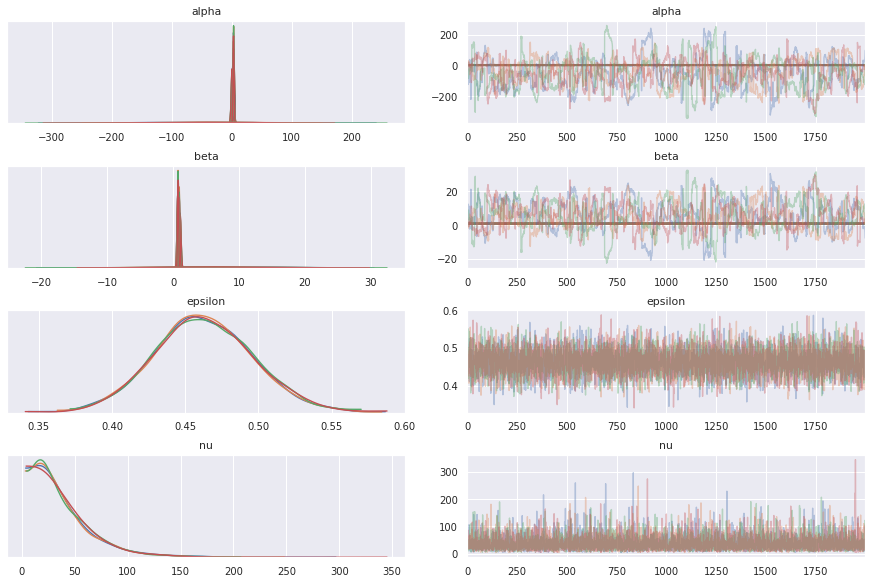

In [8]:
varnames=['alpha', 'beta', 'epsilon', 'nu']
pm.traceplot(trace_up, varnames)

## Hierarchical model

As only have a single datapoint in the last group can't perform linear regression.
Using a hierarchical model allows pooling of all the data so can perform the regression for all groups.

The top layer in the diagram below has a single distribution over all the data while the second layer has a distribution per group.

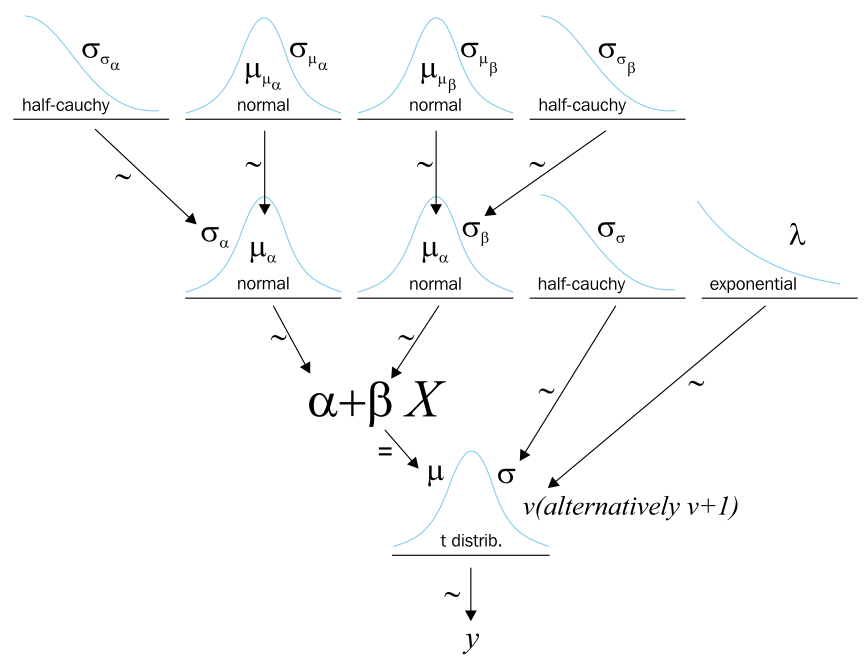

In [9]:
hierarchical_model = pm.Model()
with hierarchical_model:
    # single distribution for all data - alpha & beta
    alpha_tmp_mu = pm.Normal('alpha_tmp_mu', mu=0, sd=10)  
    alpha_tmp_sd = pm.HalfNormal('alpha_tmp_sd', 10)  # HalfNormal has a single param giving variance - pk at 0
    beta_mu = pm.Normal('beta_mu', mu=0, sd=10)
    beta_sd = pm.HalfNormal('beta_sd', sd= 10)
    
    # single distribution for all data - noise:
    epsilon = pm.HalfCauchy('epsilon', 5)  # Noise in each group
    nu = pm.Exponential('nu', 1/30)  # Size of tails in noise distribution
    
    # distribution per group - alpha & beta:
    alpha_tmp = pm.Normal('alpha_tmp', mu=alpha_tmp_mu, sd=alpha_tmp_sd, shape=M)
    beta = pm.Normal('beta', mu=beta_mu, sd=beta_sd, shape=M)
    
    # likelihood:
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx] * x_centered, sd=epsilon, nu=nu, observed=y_m)
    
    # Translate centered data back into original coords:
    alpha = pm.Deterministic('alpha', alpha_tmp - beta*x_m.mean())
    alpha_mu = pm.Deterministic('alpha_mu', alpha_tmp_mu - beta_mu*x_m.mean())
    alpha_sd = pm.Deterministic('alpha_sd', alpha_tmp_sd - beta_sd*x_m.mean())    

In [10]:
with hierarchical_model:
       trace_hm = pm.sample(5000, init='advi', n_init=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 151.84: 100%|██████████| 50000/50000 [00:27<00:00, 1843.32it/s]
Finished [100%]: Average Loss = 151.77
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha_tmp, nu, epsilon, beta_sd, beta_mu, alpha_tmp_sd, alpha_tmp_mu]
Sampling 4 chains, 3,252 divergences: 100%|██████████| 22000/22000 [00:51<00:00, 425.55draws/s]
There were 1683 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.47535269707220107, but should be close to 0.8. Try to increase the number of tuning steps.
There were 692 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.677754466797307, but should be close to 0.8. Try to increase the number of tuning steps.
There were 402 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not m

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e10c5390>,
      dtype=object)

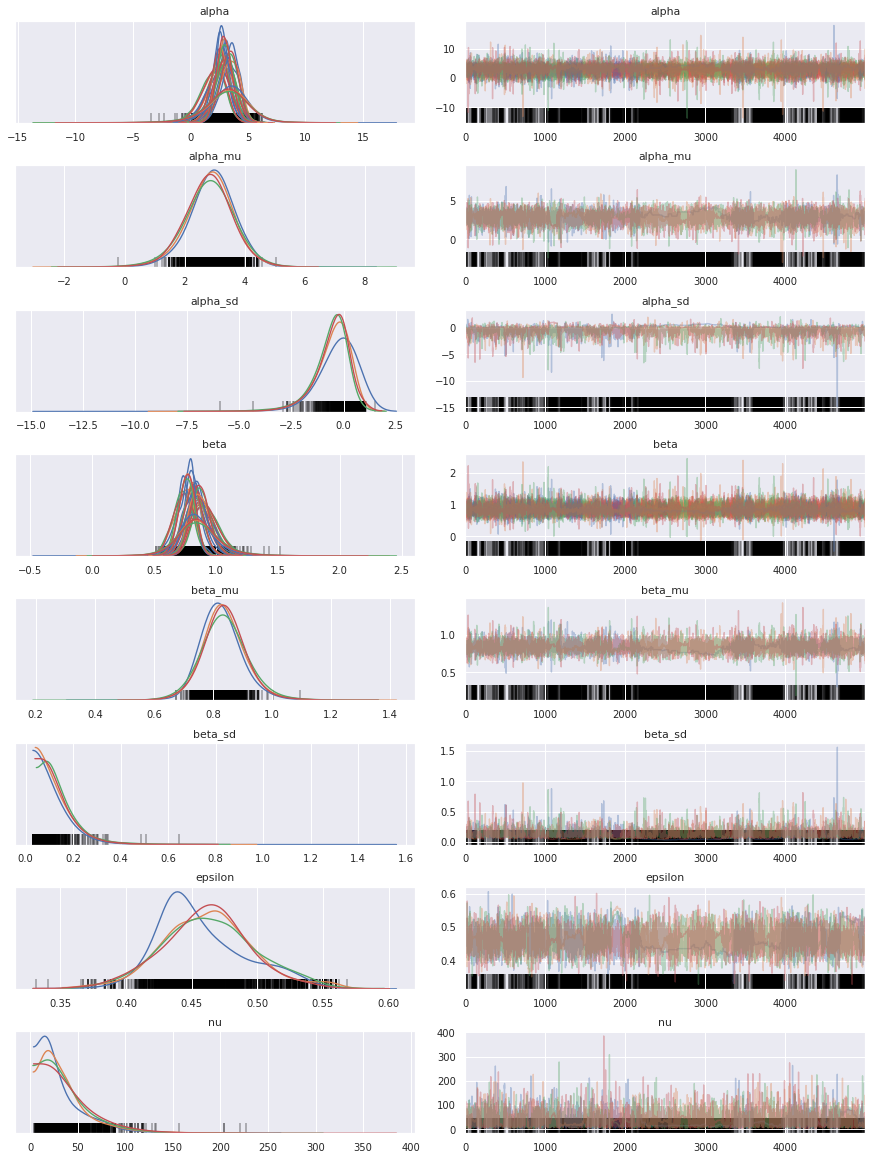

In [11]:
varnames=['alpha', 'alpha_mu', 'alpha_sd', 'beta', 'beta_mu', 'beta_sd', 'epsilon', 'nu']
pm.traceplot(trace_hm, varnames)

Even the group with a single datapoint has a reasonable linear line fit because we have used hierachical linear regression.

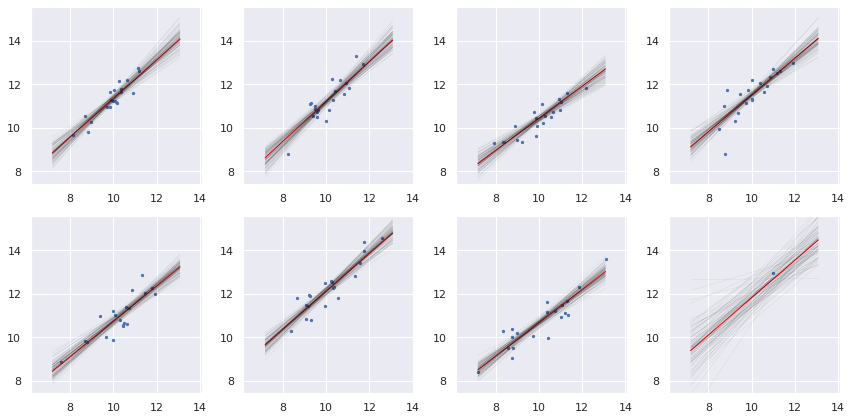

In [12]:
fig = plt.figure(figsize=(12, 6)) 
num_curves = 100

j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10) 
for i in range(M): 
    plt.subplot(2,4,i+1)
    plt.scatter(x_m[j:k], y_m[j:k], s=5) 
    alfa_m_best = trace_hm['alpha'][:,i].mean() 
    beta_m_best = trace_hm['beta'][:,i].mean()
    alfa_m = trace_hm['alpha'][-num_curves:,i]
    beta_m = trace_hm['beta'][-num_curves:,i]
    plt.plot(x_range, alfa_m_best + beta_m_best*x_range, c='red', linewidth=1) 
    for l in range(num_curves):
        plt.plot(x_range, alfa_m[l] + beta_m[l]*x_range, c='k', linewidth=0.1, alpha=0.4) 
    plt.xlim(x_m.min()-1, x_m.max()+1) 
    plt.ylim(y_m.min()-1, y_m.max()+1) 
    j += N 
    k += N
plt.tight_layout()